
# Project: Investigate a Dataset - [noshowappointments-kagglev2-may]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#read">Reading the data</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#research questions">Research Questions</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

Medical appointments has been a helpful procedure to many health practitioners. The use of appointments as amethod in assessing these health practitioners has curtailed issues such as over crowding, bad time management, and many others. This project is designed to analyse the datasets from 100,000 medical appointments in Brazil. The main objective of this project is to determine whether patients do show up for their appointment or not. 

In this project we are going to use the [noshowappointments-kagglev2-may-2016.csv file to execute our work](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv). The execution of the task will consist of :
1. Use of Jupyter Notebook
2. Use of data packages such as numpy, pandas, matplotlib, etc.
3. Reading of the CSV file
4. Data Wrangling.
5. Exploratory Data Analysis
6. Conclusions

**Some of the research questions to be tackled includes**:
1. What analysis can we make from the data sheet?
2. What is the Total number of males to females?
3. How many of appointments had patients showing up and how many didn't?
4. How many appointments were booked and the number of days these appointments took place?
5. How many appointments had their patients enrolled on the scholarship?
6. What is the age range, minimum age and maximum age?



<a id='read'></a>
## Reading the data

The reading of the data allows one to understand the kind of data sets he or she has. The data set file was opened with jupyter notebook to be certain it was a [csv file](noshowappointments-kagglev2-may-2016.csv) . In proving that, we checked the comma correlated with the arrangements of columns and rows. The csv will be loaded unto pandas.

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load csv
noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# Next step will be to know how large the dataset is, in terms of how many rows and columns. 
noshow.shape 

(110527, 14)

After running the code in [2] the output shows a total of 110527 rows and 14 columns. 

<a id='wrangling'></a>
## Data Wrangling

After loading our csv file and knowing the type of data we are going to work with it's neccessary to clean, trim and unify messy and complex data for easy access and analysis. Afterwards, this will enable us to effectively explore the dataset available. 



In [3]:
# We want to know how many unique values we have in each column.
noshow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Research Question 1

The analysis of the data sheet was done by using the number of unique values in each column

1. From running the code [3] we realize that the total numnber of patient ID's corresponds to 62,299. This number consists of all patients in their various hospitals been added together. 
2. From the output of code [2] and [3] we can conclude by saying the number of rows correspond to the number of AppointmentID'S.
3. Comparing the number of patients ID's to the number of appointment ID's, we can make an analyis that some patients had more than one appointment. 
4. We can also conclude that the total number with respect to locations for the hospital were 81, indicating that 81 different hospitals in different locations had patients booking an appointment with them. 
5. The appointment day which is 27 also makes us aware of the number of days in which the appointments took place.
6. We had 104 different ages meaning some of the patients had similar ages.

In [4]:
# We are running this code to have a look at the age range within our data
noshow['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In output[4] we have an invalid age of -1

In [5]:
# We want to know why our age is -1
noshow_negative_age = noshow.query('Age == -1')

In [6]:
noshow_negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
# We want to have a description of our data sets with respect to the numerical aspect. 
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From running code [7] we can identify the maximum age of the patients to be 115

In [8]:
Age_mean = round(noshow['Age'].mean())
Age_mean

37.0

In [9]:
# We will replace our -1 with the mean age which is 37. Since we can't drop the entire row.
# Also we don't know why we have a negative value as such it will be best to use the mean value

noshow['Age'].replace(-1, value = Age_mean, inplace=True)

In [10]:
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From out[10] we can observe that now the minimum age is 0 and the maximum age still remains at 115. 

In [11]:
# Having a description on which data sets contains value or a string
noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [12]:
noshow['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

We can clearly see that our age data is now clean and ready to be used. 

In [13]:
# We will like to see the information on our datasets
noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
# Now we will like to see the most frequent object under the No-show column
mode_nos = noshow['No-show'].mode()[0]
mode_nos

'No'

The most occuring string is No meaning more patients showed up to their appointments. 

In [15]:
# We want to count the number of No to Yes under the column No-show
pd.value_counts(noshow['No-show'])

No     88208
Yes    22319
Name: No-show, dtype: int64

From Out[15] we can attest to the fact that 88208 appointments had their patients showing up and 22319 appointments didn't have their patients showing up. 

In [16]:
# We want to count the number of males to females 
pd.value_counts(noshow['Gender'])

F    71840
M    38687
Name: Gender, dtype: int64

We have a total number of 71840 females to 38687 Males

In [17]:
# We want to count the number of appointments that had patients on the Brasilian welfare scholarship
pd.value_counts(noshow['Scholarship'])

0    99666
1    10861
Name: Scholarship, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

Our data is now cleaned and we can do some exploration and create visualizations. 

NB: A video tutorial on the repetitive coding correction will be helpful.


Text(0.5,1,'Scatter plot')

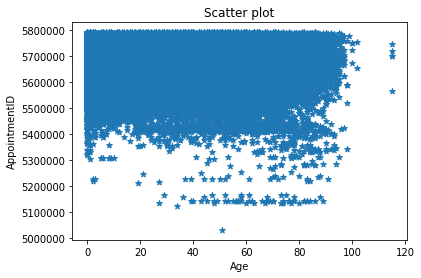

In [18]:
#Plotting the Scatter plot of the Age with th AppointmentID
Age = noshow['Age']
AppointmentID = noshow['AppointmentID']
plt.scatter(Age, AppointmentID, marker = '*')
plt.xlabel('Age')
plt.ylabel('AppointmentID')
plt.title('Scatter plot')

From the Scatter diagram patients with ages from 100 below had few appointmentID.

Text(0.5,1,'Histogram Plot')

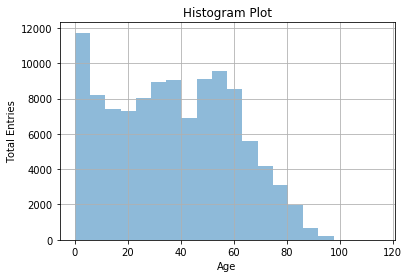

In [19]:
#Plotting the Histogram of the Age
noshow.Age.hist(alpha=0.5, bins=20, label='Age')
plt.xlabel('Age')
plt.ylabel('Total Entries')
plt.title('Histogram Plot')

From the histogram , the age range with the highest number of entries were that of 0-20, and the lowest were from 60-100 plus.

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5,0,'SMS') Text(0,0.5,'Total Entries') Text(0.5,1,'Histogram Plot')
None


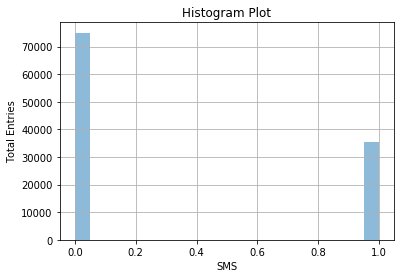

In [20]:
#Plotting the Histogram of the SMS_received

def function():
    x = noshow.SMS_received.hist(alpha=0.5, bins=20, label='SMS_received')
    b = plt.xlabel('SMS')
    c = plt.ylabel('Total Entries')
    d = plt.title('Histogram Plot')
    print(x,b,c,d)
y = function()
print(y)


The histogram plot for the SMS gives us a clear idea on the number of people who recieved an SMS and the number of people who didnt.

Text(0.5,1,'Scatter Plot')

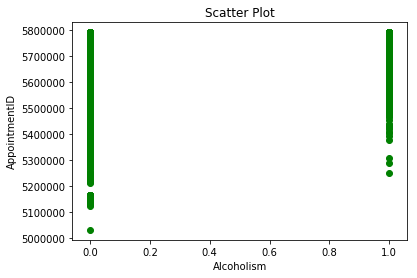

In [21]:
Alcoholism = noshow['Alcoholism']
AppointmentID = noshow['AppointmentID']
plt.scatter(Alcoholism, AppointmentID, color='green')
plt.xlabel('Alcoholism')
plt.ylabel('AppointmentID')
plt.title('Scatter Plot')

Also from the Scatter plot we can deduce the number of patients ID's with alcoholism issues from those without. 

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


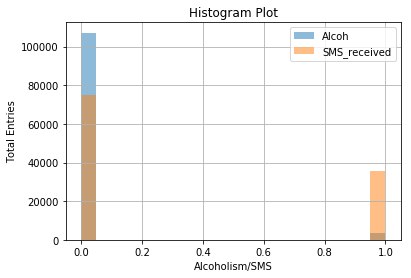

In [22]:
e = noshow.Alcoholism.hist(alpha=0.5, bins=20, label='Alcoh')
f = noshow.SMS_received.hist(alpha=0.5, bins=20, label='SMS_received')
print(e,f)
plt.xlabel('Alcoholism/SMS')
plt.ylabel('Total Entries')
plt.title('Histogram Plot')
plt.legend();
plt.show()



From the histogram we can make deductions from plotting the patients ID's with Alcholism issue and the SMS received. Patients who received an sms were more than those who had alcoholic issues. 

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


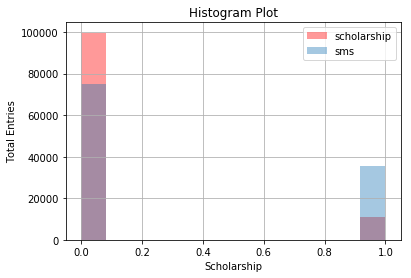

In [23]:
# Investigate whether the scholarship played a role in determining whether people did show up for their appointments or not. 
g = noshow.Scholarship.hist(alpha = 0.4, bins=12, color='red', label= 'scholarship')
f =noshow.SMS_received.hist(alpha = 0.4, bins=12, label= 'sms')
print(g,f)
plt.xlabel('Scholarship')
plt.ylabel('Total Entries')
plt.title('Histogram Plot')
plt.legend();

From the histogram we can make deductions from plotting the scholarship and the sms. We can conclude that more people had an sms than been enrolled on the shcolarship. 

<a id='research questions'></a>
## Research Question Solutions
2. What is the Total number of males to females?
**Ans**: We had 71840 Females and 38687 Males

3. How many of the appointments had patients showing up and how many didn't?
**Ans**: We had 88208 appointments having their patients showing up and 22319 which had patients not showing up.

4. How many appointments and the number of days these appointments took place?
**Ans**: We had a total of 110527 appointments and 27 different days o which these appointments were scheduled on.

5. How many appointments had their patients enrolled on the scholarship?
**Ans**: 99666 appointments had patients with no scholarship whiles 10861 appointments had patients with scholarship. 

6. What is the age range, minimum age, maximum age and mean?
**Ans**: After cleaning the age data, the age range was from 0-115, with 0 been the minimum and 115 been the maximum. The mean age was 37




<a id='conclusions'></a>
## Conclusions

**Summary of findings

The data had a total of 110527 rows and 14 columns. We were able to deduce the numerous unique value, after running the third code[3]. From the data we realize that the addition of all the hospitals has a total of 62,299 patient ID's.From our analysis we can conclude and say the number of rows correspond to the number of AppointmentID'S. From this we can also conclude that some patients had more than one appointment. The appointments were scheduled in 81 different hospitals in different locations. The appointment day which is 27 also makes us aware of the number of days in which the appointments took place.We had 104 different ages meaning some of the patients had similar ages.
Our mean age was 37 and a total number of 71840 appointments been females to 38687 appointments Males.


**Histogram Analysis**

1.Looking at the histogram we can deduce that more people didn't receive an SMS.

2.From the histogram we can also make emphais of the number of patients having alcoholism issues are few.

3.From the age histogram chart, we could dedudce the age range that had the highest number of appointments and also the age range that had the lowest number of appointments. The age range with the highest number of appointment were that of 0-20, and the lowest were from 60-100 plus. 

4.From the histogram we realise that neither Alcholism, scholarship, nor SMS had a major effect on why patients didn't turn up for their appointments.  

## Limitations
The data had the age column having a negative value which whould have comprimised the exactness or correctness of the analysis of the data. The patient with an incorrect age had their appointment ID number as 5775010, was a female and had the appointment in the ROMÃƒO neighbourhood.

The limitation was corrected by using the mean age, our sample data was good enough to be used.

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0